#📌 Extracción

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [3]:
url = 'https://raw.githubusercontent.com/Almintar/telecomX-Churn-de-Clientes-data-science/refs/heads/main/Datos_limpios.csv'

datos = pd.read_csv(url)
datos.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##🔧 Transformación

In [4]:
# Columnas a descartar
cols_drop = ['customerID', 'Cuentas_Diarias']
datos = datos.drop(columns=cols_drop)
print('Columnas después de limpiar:', datos.columns.tolist())


Columnas después de limpiar: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [5]:
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [6]:
# Transformar columna Churn
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})
print(datos['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [7]:
# Separar variables numéricas y categóricas
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen']
columnas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

# One-Hot Encoding para categóricas
datos_encoded = pd.get_dummies(datos, columns=columnas_categoricas, drop_first=True)
datos_encoded.head()


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [8]:
datos_encoded.columns

Index(['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Proporción de clientes que cancelaron en relación con los que permanecieron activos.

In [9]:
# Calcular el conteo de clientes por clase
conteo_churn = datos['Churn'].value_counts()

# Calcular la proporción (en porcentaje) de cada clase
proporcion_churn = (datos['Churn'].value_counts(normalize=True) * 100).round(2)

# Mostrar resultados
print('Conteo de clientes por clase:\n', conteo_churn)
print('\nProporción de clientes por clase (%):\n', proporcion_churn)


Conteo de clientes por clase:
 Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes por clase (%):
 Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


/tmp/ipython-input-3780335231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Clase', y='Conteo', palette=['#203f75', '#e23155'])


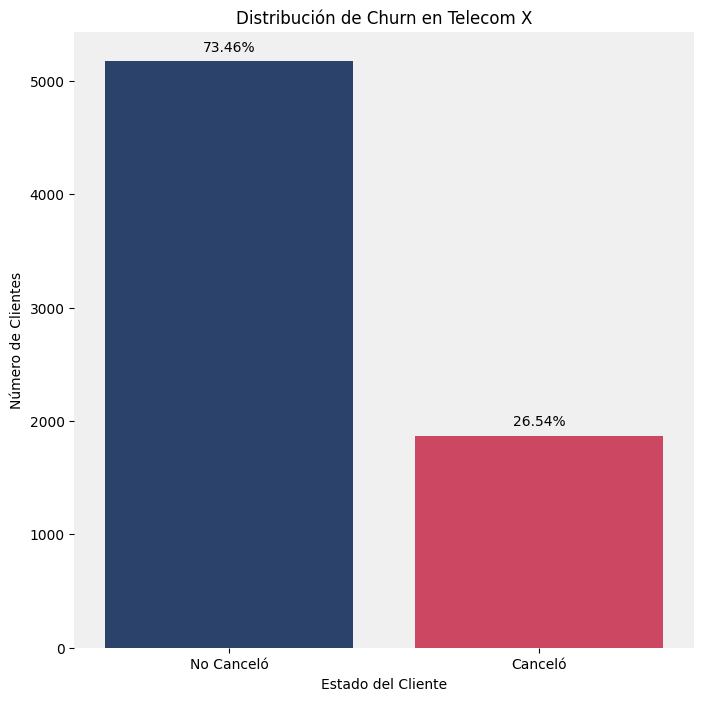

In [10]:
# Preparar DataFrame para graficar
df_plot = pd.DataFrame({
    'Clase': ['No Canceló', 'Canceló'],
    'Conteo': conteo_churn.values,
    'Proporción (%)': proporcion_churn.values
})

# Crear gráfico con seaborn
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df_plot, x='Clase', y='Conteo', palette=['#203f75', '#e23155'])

# Fondo gris claro
ax.set_facecolor('#f0f0f0')

# Eliminar líneas spines
sns.despine(left=True, bottom=True)

# Agregar etiquetas con la proporción (%) encima de cada barra
for i, p in enumerate(ax.patches):
    ax.annotate(f"{df_plot['Proporción (%)'][i]}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

# Personalizar gráfico
plt.title('Distribución de Churn en Telecom X')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Clientes')
plt.show()

In [11]:
print(datos_encoded['Churn'].isnull().sum())

0


In [12]:
from imblearn.over_sampling import SMOTE

X = datos_encoded.drop(columns=['Churn'])
y = datos_encoded['Churn']

# sampling_strategy=1.0 → balancea para que ambas clases tengan el mismo número de registros.
# random_state=42 → factor de reproducibilidad
# k_neighbors=5 → cada punto minoritario busca 5 vecinos para generar ejemplos sintéticos.
smote = SMOTE(sampling_strategy=1.0, random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)

print('Distribución antes del SMOTE:\n', y.value_counts(),'\n')
print('Distribución después de SMOTE:\n', y_smote.value_counts(),'\n')

datos_balanceados = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name='Churn')], axis=1)
print('datos_balanceados:\n', datos_balanceados.head())

Distribución antes del SMOTE:
 Churn
0    5174
1    1869
Name: count, dtype: int64 

Distribución después de SMOTE:
 Churn
0    5174
1    5174
Name: count, dtype: int64 

datos_balanceados:
    SeniorCitizen  tenure  Charges.Monthly  Charges.Total  gender_Male  \
0              0       9             65.6         593.30        False   
1              0       9             59.9         542.40         True   
2              0       4             73.9         280.85         True   
3              1      13             98.0        1237.85         True   
4              1       3             83.9         267.40        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4         True           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...

##🔧 Transformación de Datos (Normalizacion)

In [13]:

from sklearn.preprocessing import MinMaxScaler

# Normalizar variables numéricas entre 0 y 1
scaler_minmax = MinMaxScaler()
datos_encoded[columnas_numericas] = scaler_minmax.fit_transform(datos_encoded[columnas_numericas])

print('Shape final del dataset:', datos_encoded.shape)
datos_encoded[columnas_numericas].head()

Shape final del dataset: (7043, 31)


,tenure,Charges.Monthly,Charges.Total,SeniorCitizen
0,0.125000,0.471144,0.066294,0.0
1,0.125000,0.414428,0.060420,0.0
2,0.055556,0.553731,0.030239,0.0
3,0.180556,0.793532,0.140670,1.0
4,0.041667,0.653234,0.028687,1.0


##📊 Análisis de Correlación

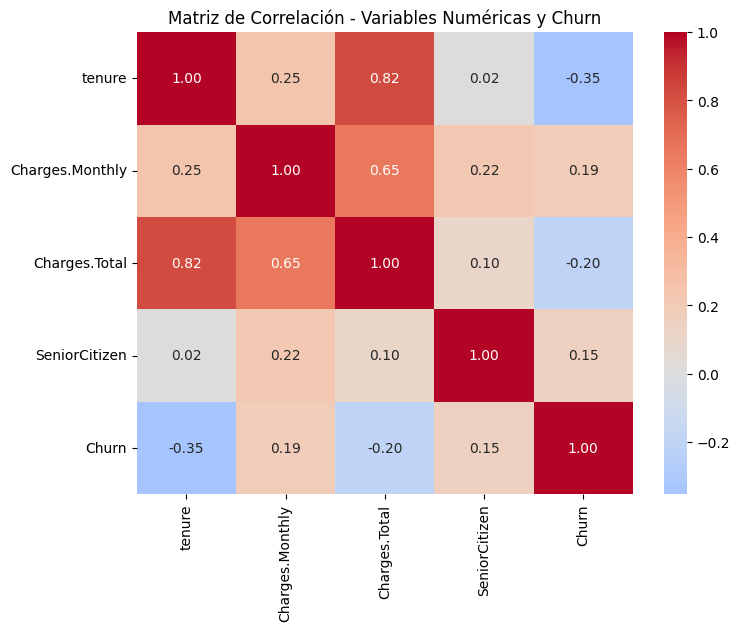

In [14]:
# Calcular matriz de correlación
corr_matrix = datos_encoded[columnas_numericas + ['Churn']].corr()

# Visualizar con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas y Churn")
plt.show()

##📊 Análisis Dirigido

/tmp/ipython-input-1005628477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=datos_encoded, palette=color_boxplot_tenure)


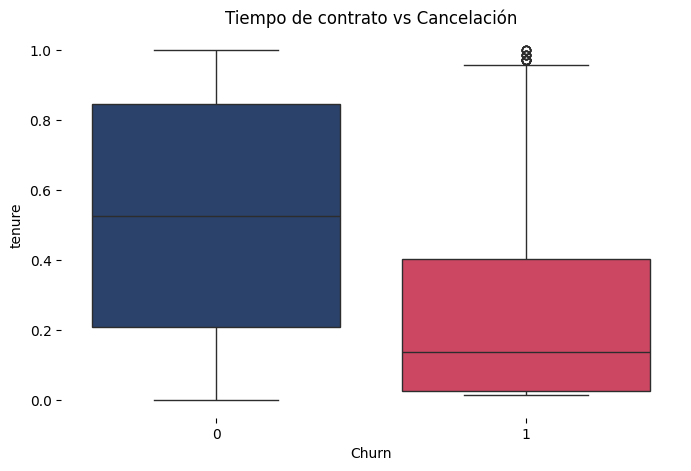

/tmp/ipython-input-1005628477.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=datos_encoded, palette=color_boxplot_charges)


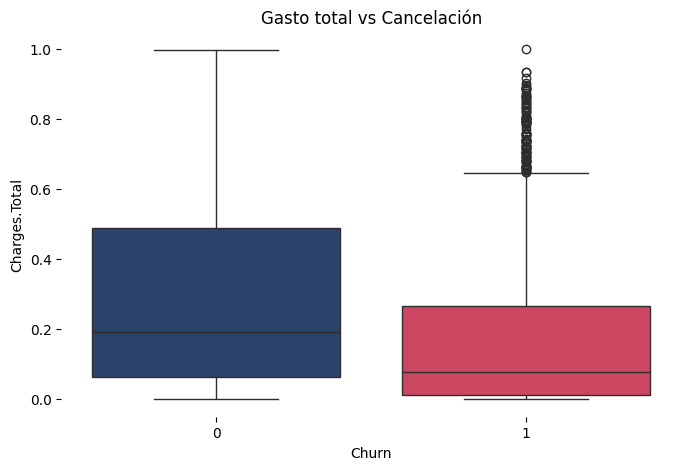

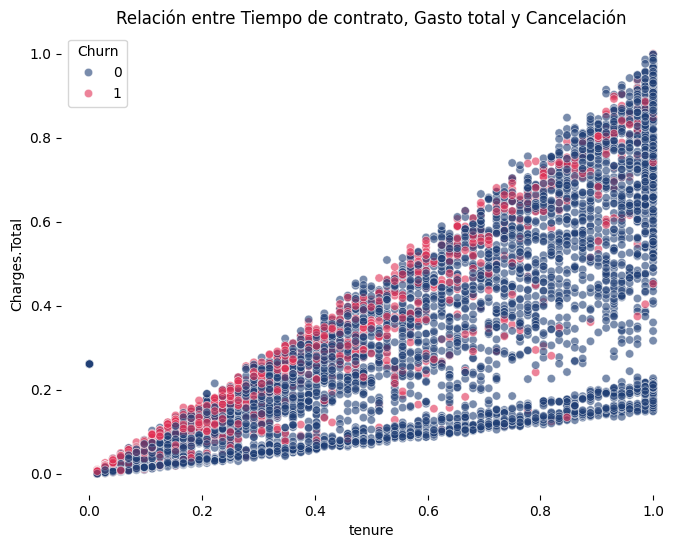

In [15]:
color_boxplot_tenure = ['#203f75', '#e23155']
color_boxplot_charges = ['#203f75', '#e23155']
color_scatter = {0: '#203f75', 1: '#e23155'}

# 1. Boxplot: Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=datos_encoded, palette=color_boxplot_tenure)
plt.title('Tiempo de contrato vs Cancelación')
sns.despine(left=True, bottom=True)
plt.show()

# 2. Boxplot: Charges.Total vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Charges.Total', data=datos_encoded, palette=color_boxplot_charges)
plt.title('Gasto total vs Cancelación')
sns.despine(left=True, bottom=True)
plt.show()

# 3. Scatter Plot: Tenure vs Charges.Total coloreado por Churn
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=datos_encoded, alpha=0.6, palette=color_scatter)
plt.title('Relación entre Tiempo de contrato, Gasto total y Cancelación')
sns.despine(left=True, bottom=True)
plt.show()



##🔧 Separación de Datos

In [17]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = datos_encoded.drop('Churn', axis=1)  # todas las variables excepto 'Churn'
y = datos_encoded['Churn']               # variable objetivo

# División en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para prueba
    random_state=42,     # semilla para reproducibilidad
    stratify=y           # asegura que la proporción de clases se mantenga en train/test
)

print('Tamaño de conjunto de entrenamiento:', X_train.shape)
print('Tamaño de conjunto de prueba:', X_test.shape)
print(f'Proporción de entrenamiento:\n{y_train.value_counts(normalize=True)}')
print(f'Proporción de prueba:\n{y_train.value_counts(normalize=True)}')

Tamaño de conjunto de entrenamiento: (5634, 30)
Tamaño de conjunto de prueba: (1409, 30)
Proporción de entrenamiento:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Proporción de prueba:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


#📊 Creación de Modelos

## Regresión Logística

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelo 1: Regresión Logística
modelo_reg_log = LogisticRegression(max_iter=1000, random_state=42)  # Número máximo de iteraciones que usará el algoritmo para converger
modelo_reg_log.fit(X_train, y_train)

# Predicciones
y_pred_lr = modelo_reg_log.predict(X_test)

print('🔹 Rendimiento Regresión Logística')
print('\nPrecisión:', accuracy_score(y_test, y_pred_lr),'\n')
print(classification_report(y_test, y_pred_lr))

🔹 Rendimiento Regresión Logística

Precisión: 0.7955997161107168 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## Modelo sin normalización → Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 2: Random Forest
modelo_rfor = RandomForestClassifier(n_estimators=200, random_state=42)  # Número de árboles en el bosque. Más árboles = más robusto, pero más lento.
modelo_rfor.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rfor.predict(X_test)

print('🔹 Rendimiento Random Forest')
print('\nPrecisión:', accuracy_score(y_test, y_pred_rf),'\n')
print(classification_report(y_test, y_pred_rf))

🔹 Rendimiento Random Forest

Precisión: 0.7913413768630234 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## Comparación de resultados

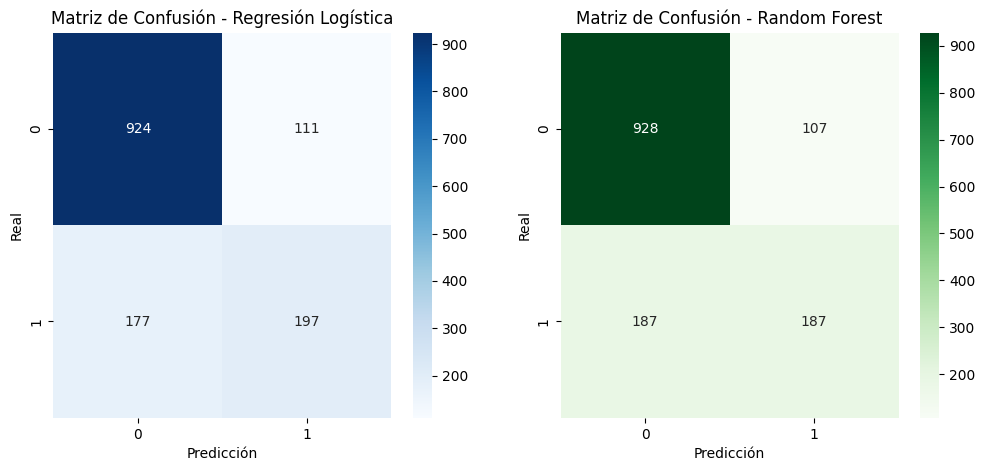

In [25]:
# Matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Regresión Logística")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.show()

# Evaluación de los Modelos


🔹 Resultados para Regresión Logística 

Exactitud (Accuracy): 0.7956
Precisión: 0.6396
Recall: 0.5267
F1-score: 0.5777

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



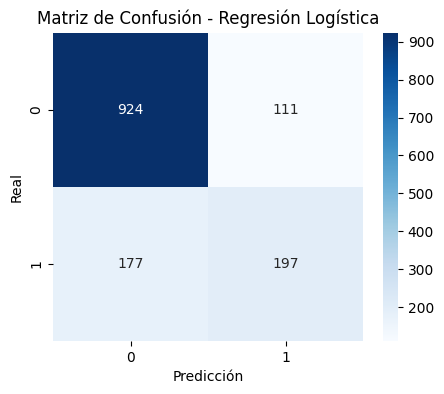


🔹 Resultados para Random Forest 

Exactitud (Accuracy): 0.7913
Precisión: 0.6361
Recall: 0.5000
F1-score: 0.5599

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



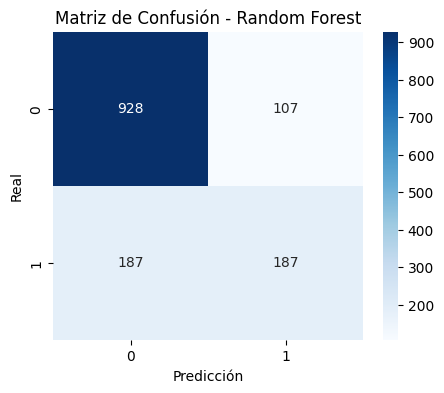

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# y_test -> valores reales
# y_pred_lr -> predicciones Regresión Logística
# y_pred_rf -> predicciones Random Forest

def evaluar_modelo(y_test, y_pred, nombre_modelo):
    print(f'\n🔹 Resultados para {nombre_modelo}','\n')
    print(f'Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.4f}')

    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_lr, 'Regresión Logística')

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, 'Random Forest')

#📊 Análisis de la Importancia de las Variables

##📌 1. Regresión Logística – Coeficientes

                                 Variable  Coeficiente  Importancia
1                                  tenure    -3.112048     3.112048
25                      Contract_Two year    -1.323818     1.323818
3                           Charges.Total     1.190948     1.190948
10            InternetService_Fiber optic     0.776315     0.776315
24                      Contract_One year    -0.694802     0.694802
19                        TechSupport_Yes    -0.414023     0.414023
28         PaymentMethod_Electronic check     0.409419     0.409419
26                   PaperlessBilling_Yes     0.360356     0.360356
7                        PhoneService_Yes    -0.336498     0.336498
13                     OnlineSecurity_Yes    -0.327905     0.327905
9                       MultipleLines_Yes     0.313195     0.313195
21                        StreamingTV_Yes     0.255099     0.255099
8          MultipleLines_No phone service     0.201774     0.201774
0                           SeniorCitizen     0.

/tmp/ipython-input-3234445482.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeficientes.head(15), x='Coeficiente', y='Variable', palette='coolwarm')


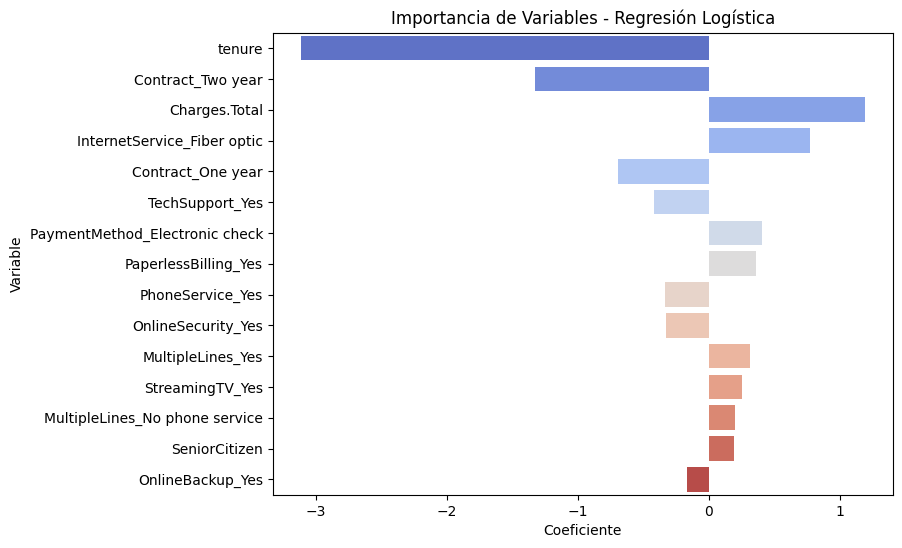

In [55]:
# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_reg_log.coef_[0]
})

# Ordenar por importancia absoluta
coeficientes['Importancia'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values(by='Importancia', ascending=False)

print(coeficientes)

# Visualización

plt.figure(figsize=(8,6))
sns.barplot(data=coeficientes.head(15), x='Coeficiente', y='Variable', palette='coolwarm')
plt.title('Importancia de Variables - Regresión Logística')
plt.show()

##📌 2. Random Forest – Importancia de Variables


                                 Variable  Importancia
3                           Charges.Total     0.196291
1                                  tenure     0.167726
2                         Charges.Monthly     0.166671
28         PaymentMethod_Electronic check     0.039522
10            InternetService_Fiber optic     0.037800
25                      Contract_Two year     0.032938
4                             gender_Male     0.027370
13                     OnlineSecurity_Yes     0.025877
26                   PaperlessBilling_Yes     0.025504
19                        TechSupport_Yes     0.023639
5                             Partner_Yes     0.022821
24                      Contract_One year     0.022724
15                       OnlineBackup_Yes     0.021576
9                       MultipleLines_Yes     0.020880
6                          Dependents_Yes     0.020589
0                           SeniorCitizen     0.020285
17                   DeviceProtection_Yes     0.019035
23        

/tmp/ipython-input-3005921234.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_rf.head(15), x='Importancia', y='Variable', palette='viridis')


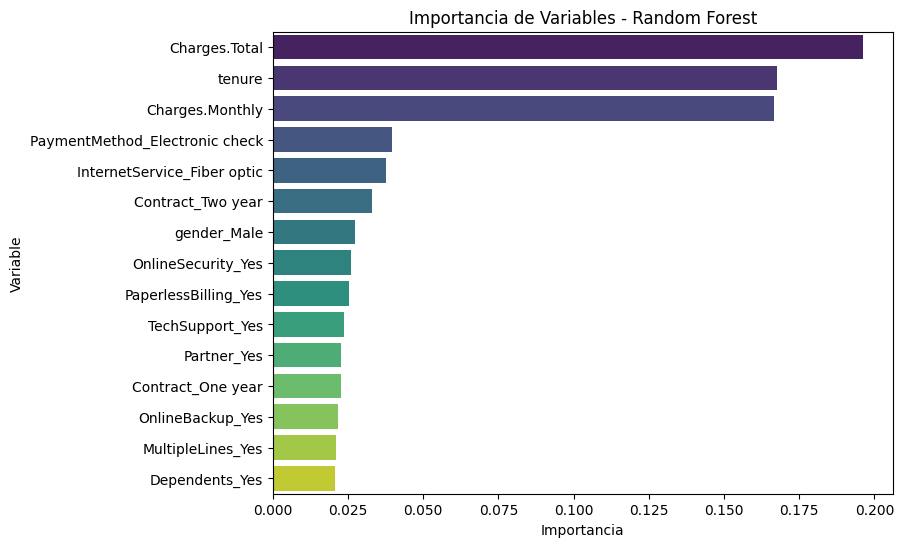

In [56]:
importances = modelo_rfor.feature_importances_

importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(importancia_rf)

# Visualización
plt.figure(figsize=(8,6))
sns.barplot(data=importancia_rf.head(15), x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de Variables - Random Forest')
plt.show()

# INFORME

## Telecom X – Parte 2: Predicción de Cancelación (Churn)

### 📌 Introducción

En el sector de telecomunicaciones, la retención de clientes es un desafío clave debido a la alta competencia y los costos de adquisición. Este análisis se enfoca en identificar los factores que influyen en la cancelación de clientes de Telecom X y en desarrollar modelos predictivos para anticipar este comportamiento. Se aplican técnicas de procesamiento de datos y modelado supervisado con el objetivo de seleccionar el mejor modelo y proponer estrategias de retención basadas en los resultados obtenidos.

### 📌 Metodología

El desarrollo del ejercicio siguió las siguientes etapas:

**1. Preparación de datos**
- Carga y exploración del dataset de clientes de Telecom X.
- Limpieza y tratamiento de valores faltantes y variables categóricas.
- Codificación de variables categóricas mediante One-Hot Encoding.
- Normalización de variables numéricas con MinMaxScaler (0–1).

**2. División de conjuntos**

- Se realizó un split estratificado en 80% entrenamiento y 20% prueba, garantizando que la proporción de clientes que cancelan/no cancelan se mantuviera en ambos conjuntos.

**3. Modelado**

Se entrenaron y evaluaron diferentes algoritmos de clasificación supervisada:

- Regresión Logística (modelo interpretable, basado en probabilidades).

- Random Forest (ensamble de árboles de decisión, útil para medir importancia de variables).

**4. Evaluación de desempeño**

Los modelos se evaluaron mediante métricas estándar para problemas de clasificación binaria:

- Exactitud (Accuracy)
- Precisión (Precision)
- Recall (Sensibilidad)
- F1-score (balance entre precisión y recall)
- Matriz de confusión (interpretación detallada de aciertos y errores).

**5. Interpretación de variables**

- Regresión Logística: coeficientes para identificar el impacto de cada variable. (normalizada).

- Random Forest: importancia de variables según la reducción de impureza en los árboles. (sin necesidad de normalización).

**6. Análisis crítico**

- Comparación de los modelos con base en sus métricas.
- Identificación de posibles casos de overfitting o underfitting.
- Selección del modelo más adecuado para implementación práctica.

**7. Recomendaciones de negocio**

- Identificación de los principales factores de cancelación.
- Diseño de estrategias de retención personalizadas en clientes con cargos mensuales altos y en segmentos con mayor vulnerabilidad.

### 📌 Resultados del análisis

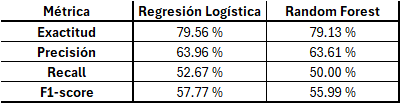

- La Regresión Logística es mejor para detectar clientes que cancelan (mayor recall y F1).

- El Random Forest es más conservador y clasifica mejor los que no cancelan.

###📌 Análisis de importancia de las variables

#### **Regresión Logística**
Es mejor identificando clientes que cancelan (más Verdaderos Positivos (VP), menos Falsos Negativos (FN)).
Útil si la prioridad es detectar churn y no dejar escapar clientes.

Principales factores asociados a la cancelación:

- Menor tiempo de permanencia (tenure) menor tiempo → mayor probabilidad de cancelar.
- Mayor cargo mensual (Charges.Monthly) asociados a mayor cancelación.
- Menor gasto acumulado (Charges.Total) reflejo de baja permanencia.

#### **Random Forest**
Es mejor prediciendo clientes que NO cancelan (menos Falsos Positivos (FP), más Verdaderos Negativos (VN)).
Útil si la prioridad es evitar alarmas falsas y clasificar bien a los que permanecen.

- Recall es más bajo que la logística, lo que indica que prefiere clasificar “no cancelación”, perdiendo clientes que realmente cancelan.

###📌 Recomendaciones y estrategias
**Incorporación y primeros 90 días**

*Acciones*: Programa de bienvenida, asistencia proactiva, y activación temprana de beneficios clave.

**Gestión de precios y planes**

*Acciones*: Ofrecer paquetes con mayor valor percibido, ofertas personalizadas, y revisar planes costosos.

**Programas de lealtad por antigüedad**

*Acciones*: Beneficios escalonados, recompensas por permanencia y descuentos por renovación.


###📌 Conclusiones

- La baja antigüedad del cliente (tenure) y los cargos mensuales elevados son los principales factores asociados a la cancelación. El gasto total acumulado también actúa como indicador relevante al reflejar la permanencia y distinguir a los clientes propensos a irse.

- La Regresión Logística se posiciona como el modelo más adecuado para su uso operativo, destacando por su buen desempeño en Recall y F1-score, métricas clave en la detección de clientes en riesgo.

- La combinación de ajuste del umbral de decisión, balanceo de clases en el modelado y ofertas segmentadas durante los primeros meses de relación con el cliente representa la estrategia más efectiva y con mayor retorno esperado para reducir la cancelación.